# Linear Regression

In [235]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("LR_SR.csv")

In [236]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [237]:
data.shape

(700, 2)

In [238]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [239]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [242]:
data.dropna(subset=['y'],inplace=True)

In [243]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [244]:
df1 = data.iloc[:,:1]
df2 = data.iloc[:,1:]

In [245]:
df1.head()

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0


In [246]:
df2.head()

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984


In [159]:
data1['region'].replace('southwest',0,inplace = True)
data1['region'].replace('southeast',0,inplace = True)
data1['region'].replace('northwest',0,inplace = True)
data1['region'].replace('northeast',0,inplace = True)

In [160]:
data1.region.unique()

array([0])

In [161]:
data1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [162]:
df3 = data1.iloc[:,:6]
df4 = data1.iloc[:,6:]

In [163]:
df3

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,0


In [164]:
df4

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [165]:
target=data1.charges

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data1,target,test_size=0.2)

In [167]:
len(X_train)

1070

In [168]:
len(y_train)

1070

In [169]:
len(y_test)

268

In [170]:
X_test.shape

(268, 7)

In [171]:
y_test.shape

(268,)

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [233]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.3058696287003416
R-squared: 0.08190146134502563


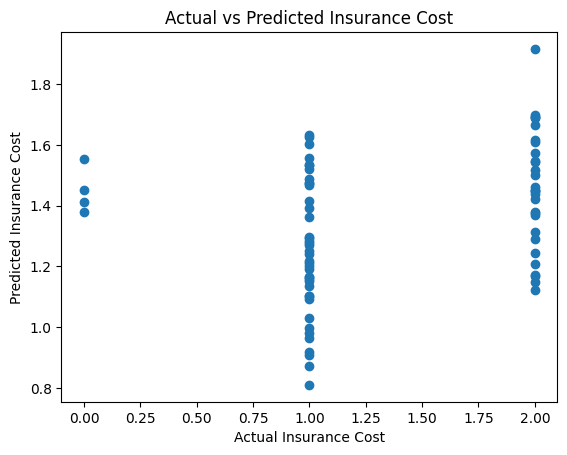

In [234]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Insurance Cost')
plt.ylabel('Predicted Insurance Cost')
plt.title('Actual vs Predicted Insurance Cost')
plt.show()

# LOGISTIC_REGRESSION

In [205]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data2 = pd.read_csv("Heart.csv")

In [206]:
data2

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [207]:
data2.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [208]:
data2.shape

(303, 15)

In [209]:
data2.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [210]:
data2.dropna(subset=['Ca'],inplace=True)
data2.dropna(subset=['Thal'],inplace=True)

In [211]:
data2

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [212]:
data2.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

In [213]:
data2['ChestPain'].replace('typical',0,inplace = True)
data2['ChestPain'].replace('asymptomatic',1,inplace = True)
data2['ChestPain'].replace('nonanginal',2,inplace = True)
data2['ChestPain'].replace('nontypical',3,inplace = True)

In [214]:
data2['Thal'].replace('fixed',0,inplace = True)
data2['Thal'].replace('normal',1,inplace = True)
data2['Thal'].replace('reversable',2,inplace = True)

In [215]:
data2['AHD'].replace('No',0,inplace=True)
data2['AHD'].replace('Yes',1,inplace=True)

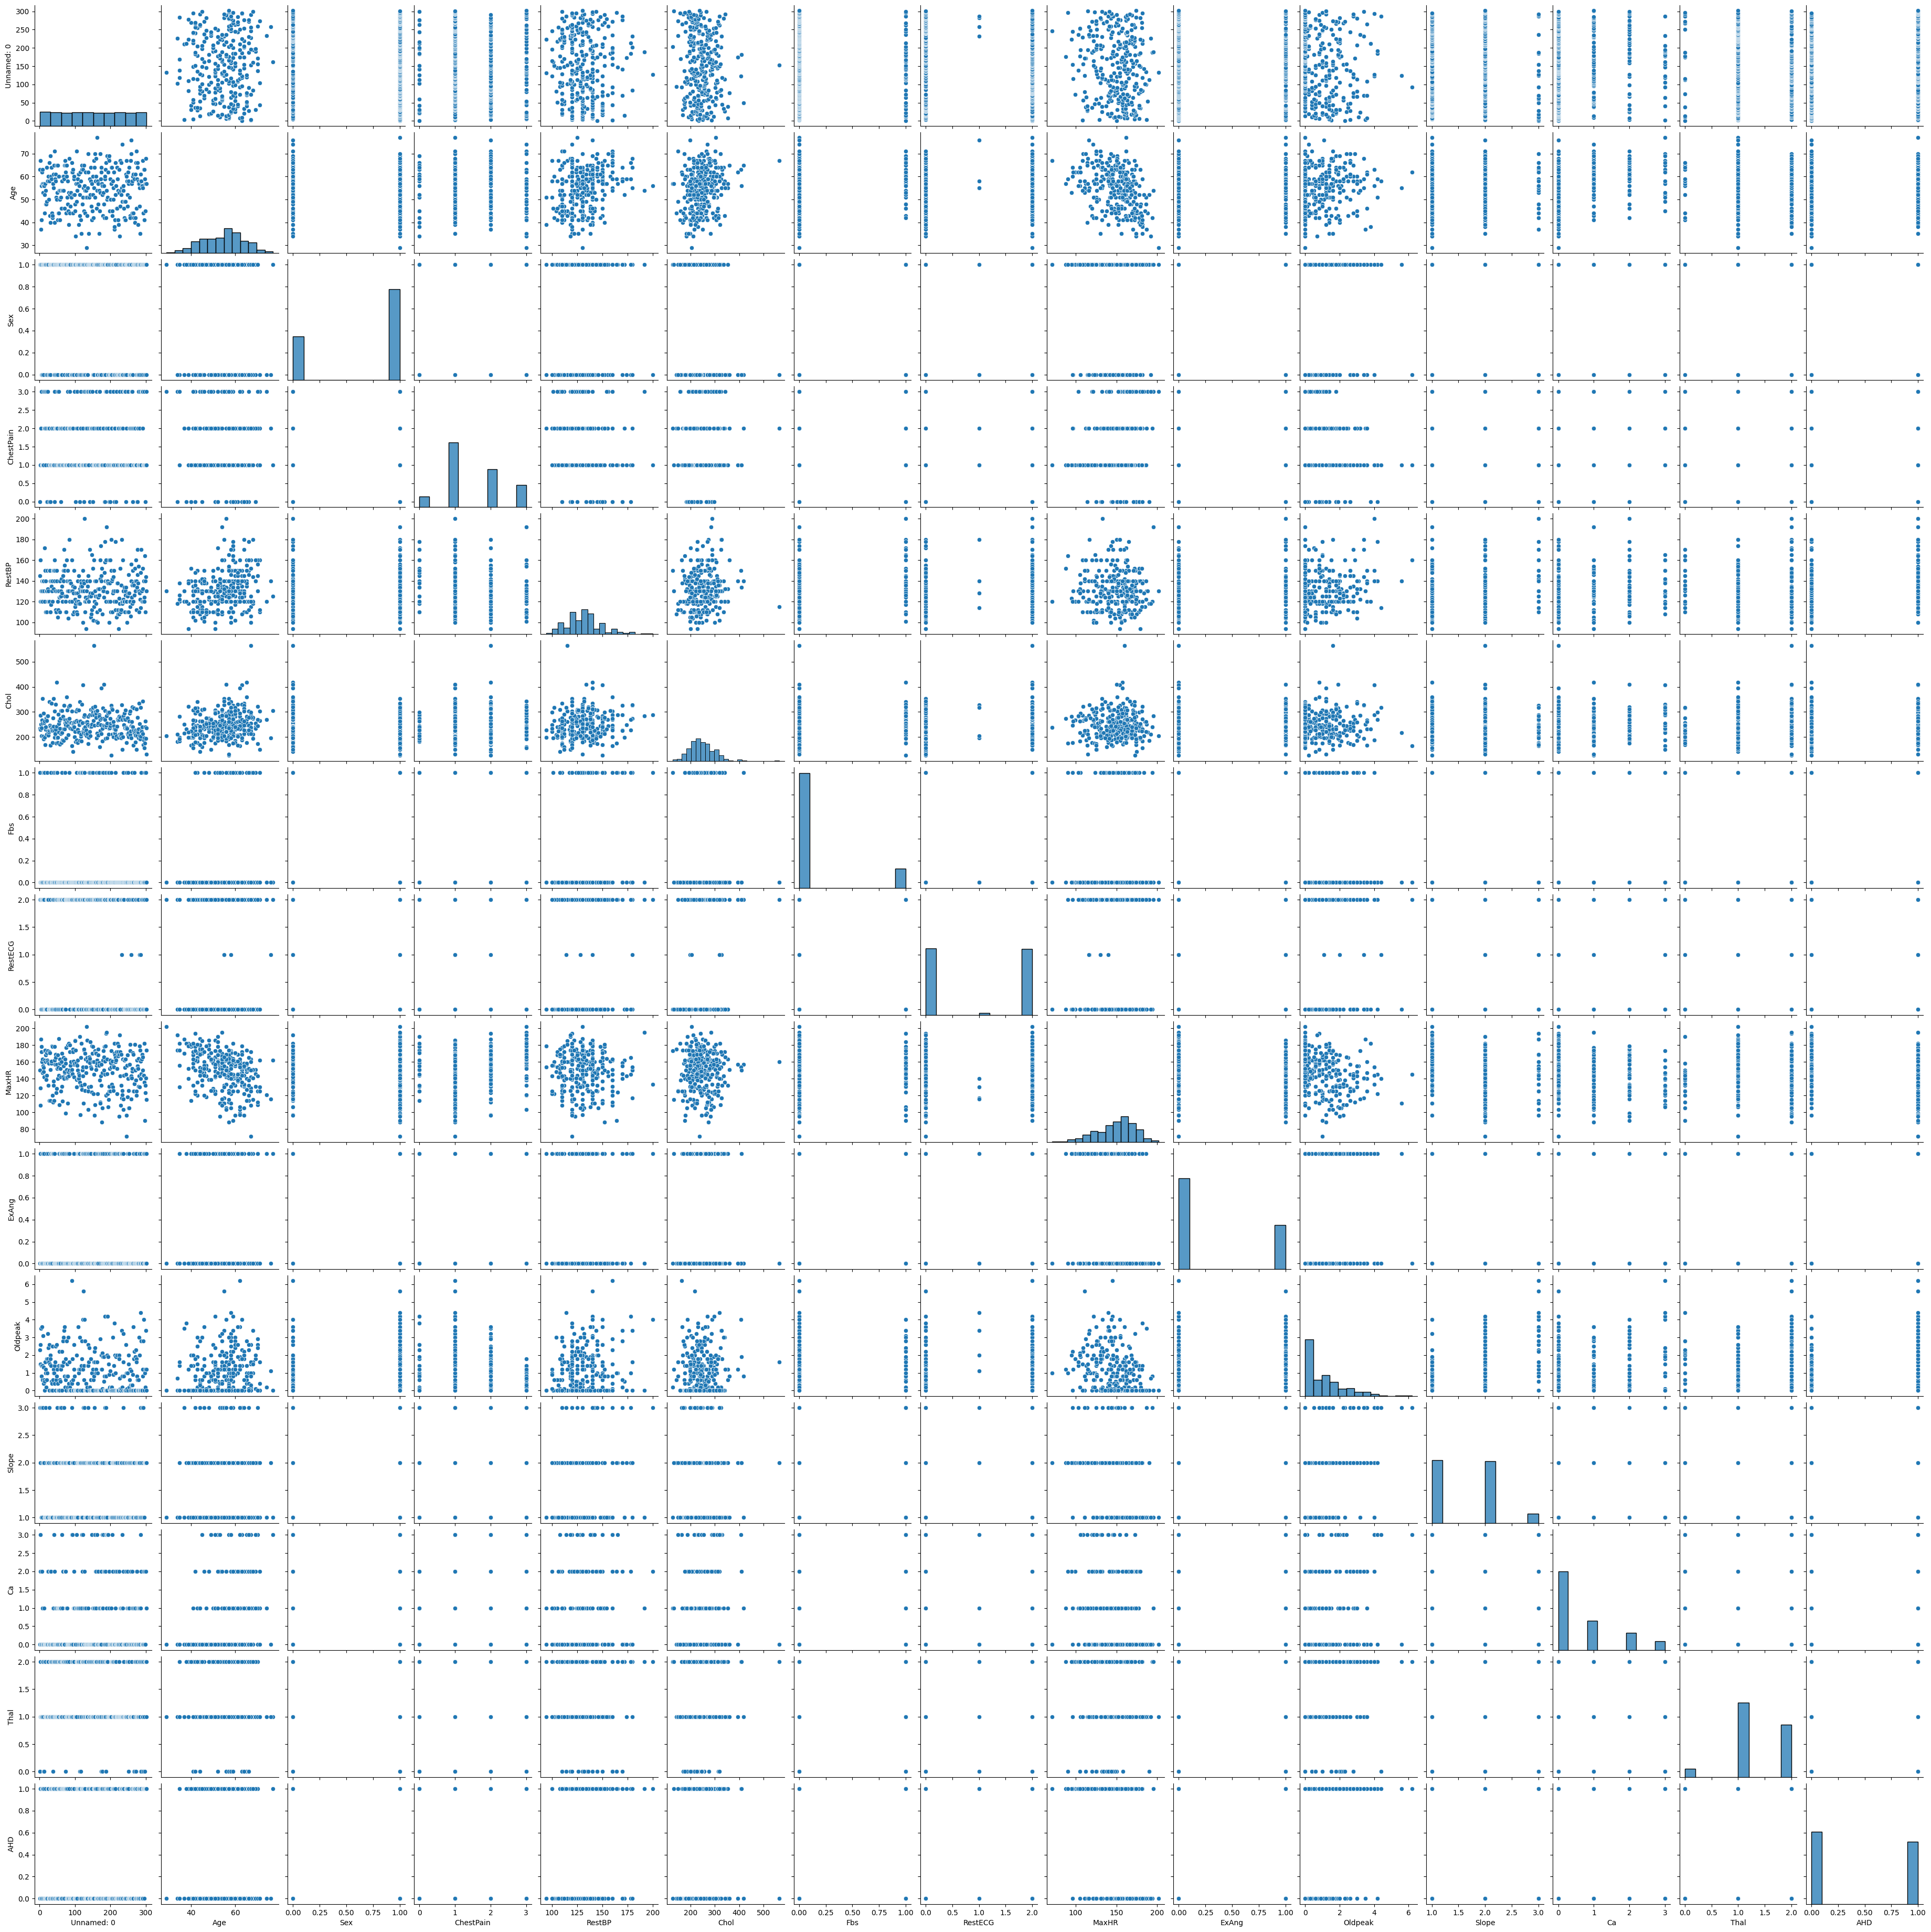

In [217]:
sns.pairplot(data=data2)

In [218]:
X = data2.iloc[:,0:13] 
y = data2.iloc[:,13]

In [219]:
X = X.values 
y = y.values

In [220]:
data2.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

In [221]:
data2.dropna(subset=['Ca'],inplace=True)
data2.dropna(subset=['Thal'],inplace=True)

In [222]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [223]:
X_std=StandardScaler().fit_transform(X)

In [224]:
X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.transform(X_test)

In [225]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=40)

In [226]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


/Users/aaryaprajapat/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [229]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1])

In [230]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.68